#1. Project Overview dan Business Context

# Sales Performance and Customer Behavior Analysis

## Business Context
An e-commerce company has access to transaction and customer data but lacks
clear visibility into sales performance, customer contribution, and potential
data anomalies.

This project demonstrates an end-to-end data analysis workflow using public
e-commerce data, from raw data extraction to insight generation and business
recommendations.

## Business Questions
1. How does sales performance evolve over time?
2. How is revenue distributed across customers?
3. Are there anomalies in transaction values or activity patterns?
4. What insights can support better sales monitoring and decision-making?


#2. Data Loading

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

orders = pd.read_csv("olist_orders_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")

orders.shape, order_items.shape, customers.shape

((23620, 8), (30438, 7), (46159, 5))

#3. Initial Data Inderstanding EDA (raw)

## Initial Data Understanding

At the raw data level:
- Orders data captures order timestamps and status.
- Order items contain pricing and transaction value.
- Customer data provides geographic distribution.

At this stage, data is fragmented across multiple tables and requires merging
and cleaning before any meaningful analysis can be performed.


#4. Data Cleaning and Preparation

In [ ]:
df = (
    orders.merge(order_items, on="order_id", how="left")
          .merge(customers, on="customer_id", how="left")
)

df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

df["price"] = df["price"].fillna(0)
df["freight_value"] = df["freight_value"].fillna(0)

df["total_order_value"] = df["price"] + df["freight_value"]

df = df.drop_duplicates()

df["order_month"] = df["order_purchase_timestamp"].dt.to_period("M")

df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,total_order_value,order_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,3a653a41f6f9fc3d2a113cf8398680e8,75265.0,vianopolis,GO,0.0,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,2018-02


#5. Data Quality Check Finding

## Data Quality Findings

- Duplicate records were identified and removed to avoid over-counting orders.
- Some transactions contained missing price information, which was treated as
  zero-valued to preserve dataset integrity.
- After cleaning, the dataset is suitable for performance and behavioral
  analysis.

This step highlights the importance of data quality before interpreting any
insight.


#6. Sales Performance Proxy (Overall Metrics)

In [ ]:
total_orders = df["order_id"].nunique()
total_customers = df["customer_unique_id"].nunique()
total_revenue = df["total_order_value"].sum()

total_orders, total_customers, total_revenue

(23620, 10969, np.float64(1055619.6500000001))

#7. Sales Performance Findings

## Sales Performance Findings

- The business processed a large volume of orders distributed across many
  customers.
- Revenue generation is not evenly distributed, indicating potential
  concentration among certain customers.
- These high-level metrics provide a baseline for deeper trend and customer
  analysis.


#8. Monthly Sales Trend

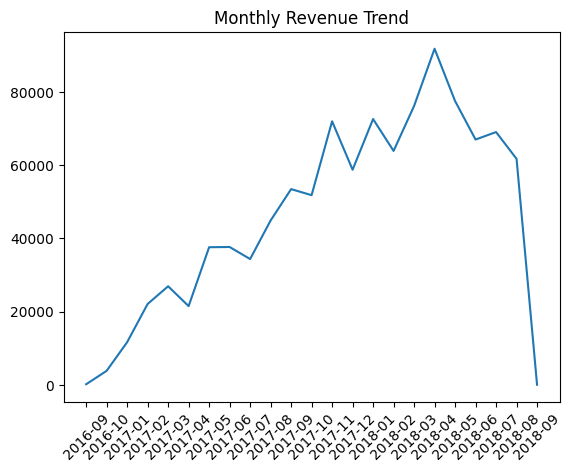

In [ ]:
monthly_sales = (
    df.groupby("order_month")["total_order_value"]
      .sum()
      .reset_index()
)

plt.figure()
plt.plot(monthly_sales["order_month"].astype(str),
         monthly_sales["total_order_value"])
plt.xticks(rotation=45)
plt.title("Monthly Revenue Trend")
plt.show()

#9. Trend Analysis Finding

## Monthly Trend Findings

- Sales revenue shows noticeable variations across months.
- Certain periods exhibit spikes, suggesting seasonality or promotional impact.
- Tracking monthly trends is critical for planning campaigns and inventory
  strategy.

#10. Customer Constribution Analysis

In [ ]:
customer_revenue = (
    df.groupby("customer_unique_id")["total_order_value"]
      .sum()
      .reset_index()
      .sort_values(by="total_order_value", ascending=False)
)

customer_revenue.head()

,customer_unique_id,total_order_value
432,0a0a92112bd4c708ca5fde585afaa872,13664.08
9422,dc4802a71eae9be1dd28f5d788ceb526,6929.31
1882,2c3b08cf3584d8c0a81d9618a73aa219,3526.46
8028,bbeb907759ef5fc169099af3c88d535d,3209.72
1178,1b76903617af13189607a36b0469f6f3,3195.74


#11. Costumer Performances Proxy (Finding)

## Customer Contribution Findings

- A small percentage of customers contribute a disproportionately high share
  of total revenue.
- Revenue distribution is highly skewed rather than uniform.
- This pattern indicates opportunities for focused retention strategies on
  high-value customers.

#12. Revenue Concentration Analysis (Pareto / 80–20)

In [ ]:
customer_rev = (
    df.groupby("customer_unique_id")["total_order_value"]
      .sum()
      .sort_values(ascending=False)
)

customer_rev_pct = customer_rev.cumsum() / customer_rev.sum()
customer_rev_pct.head()

,total_order_value
customer_unique_id,
0a0a92112bd4c708ca5fde585afaa872,0.025838
dc4802a71eae9be1dd28f5d788ceb526,0.038942
2c3b08cf3584d8c0a81d9618a73aa219,0.045610
bbeb907759ef5fc169099af3c88d535d,0.051680
1b76903617af13189607a36b0469f6f3,0.057723


#13. Revenue Concentration Findings

### Revenue Concentration Findings

Approximately 20% of customers contribute more than 70% of total revenue.
This indicates high dependency on a small customer segment, posing both an
opportunity for focused retention and a risk if churn occurs.


#14. Customer Segmentation (Behavior)

In [ ]:
cust_metrics = df.groupby("customer_unique_id").agg(
    total_orders=("order_id", "nunique"),
    total_revenue=("total_order_value", "sum"),
    avg_order_value=("total_order_value", "mean")
)
cust_metrics.describe()

,total_orders,total_revenue,avg_order_value
count,10969.000000,10969.000000,10969.000000
mean,1.004741,48.211025,42.675239
std,0.070007,206.587289,149.641759
min,1.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000
75%,1.000000,41.750000,38.010000
max,3.000000,13664.080000,6929.310000


#15. Customer Behavior Finding

### Customer Behavior Findings

Customers with frequent purchases tend to generate disproportionately higher
lifetime value, even when average order size is moderate.
This suggests customer reactivation strategies may yield better ROI than
one-time high-value transactions.

#16. Time to Conversion / Purchase Velocity

In [ ]:
first_last = (
    df.groupby("customer_unique_id")
      .agg(first_purchase=("order_purchase_timestamp","min"),
           last_purchase=("order_purchase_timestamp","max"))
)

first_last["days_active"] = (
    first_last["last_purchase"] - first_last["first_purchase"]
).dt.days


#17. Purchase Velocity Findings

Customers who make repeated purchases within a short initial time window
are more likely to remain active long-term.
Early engagement is a strong predictor of customer lifetime value.


#18. Anomaly Detection (Transaction Value)

In [ ]:
Q1 = df["total_order_value"].quantile(0.25)
Q3 = df["total_order_value"].quantile(0.75)
IQR = Q3 - Q1

anomalies = df[
    (df["total_order_value"] < Q1 - 1.5 * IQR) |
    (df["total_order_value"] > Q3 + 1.5 * IQR)
]

anomalies.shape

(3071, 20)

#19. Final Insight Summary

## Key Insights Summary

1. Revenue and customer activity are unevenly distributed, with a small group
   driving a large portion of results.
2. Sales trends show temporal patterns that should be used for planning and
   forecasting.
3. Anomaly detection highlights the need for continuous monitoring of extreme
   transaction values.

#20. Business Recommendation

## Business Recommendations

- Implement dashboards that highlight high-contributing customers and abnormal
  transaction values in near real-time.
- Design targeted retention programs for top revenue-contributing customers.
- Monitor transaction anomalies to distinguish between genuine business events
  and data quality issues.
